# Introduction
- Heart disease remains a critical issue in the U.S., with significant prevalence among older adults, particularly those over 75, and higher rates in males and American Indians. Key risk factors include high blood pressure, affecting nearly half of U.S. adults, obesity with a 42% prevalence, and diabetes, which is present in 10% of Americans. Unhealthy diets and insufficient physical activity further exacerbate heart disease risks. Innovative strategies and preventive measures are essential to tackle these challenges and improve heart health outcomes (Julia, 2024;  Williamson, 2024)

### Objectives of the notebook:
- Explore and preprocessing the data set for classification models

### The ML models used in this dataset are:
- Gaussian Naive Bayes (GaussianNB)
- Logistic Regression

# Importing Libraries

In [160]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Reading the dataset

In [101]:
train = pd.read_csv('/Users/derek/Desktop/PyCharm./Unit_3_X_ML/data/Exam_Data/CVD_train2.csv')
train.head()

,ID,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
1,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
2,3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
3,4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
4,5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0


In [15]:
train.shape

(252879, 20)

In [102]:
test = pd.read_csv('/Users/derek/Desktop/PyCharm./Unit_3_X_ML/data/Exam_Data/CVD_test2.csv')

test.head()

,ID,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,14,Excellent,Within the past 2 years,Yes,No,No,No,No,No,Female,70-74,152.0,52.16,22.46,No,0.0,30.0,4.0,0.0
2,16,Good,Within the past year,No,No,No,No,No,No,Male,80+,183.0,99.79,29.84,No,0.0,1.0,4.0,20.0
3,21,Fair,Within the past year,No,No,Yes,No,Yes,Yes,Male,80+,175.0,81.65,26.58,No,0.0,0.0,1.0,1.0
4,24,Good,Within the past year,No,Yes,Yes,No,No,Yes,Female,80+,160.0,70.31,27.46,Yes,12.0,8.0,16.0,4.0


In [17]:
test.shape

(61770, 19)

Train dataset to be used as for predictive analysis and the test dataset is used to predict whether the patient has a heart disease or not

In [19]:
train.describe()

,ID,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,252879.000000,252879.000000,252879.000000,252879.000000,252879.000000,252879.000000,252879.000000,252879.000000
mean,154390.724667,170.600722,83.571700,28.625810,5.095247,29.818186,15.104512,6.295489
std,89188.273334,10.662801,21.344667,6.527705,8.198861,24.868978,14.915933,8.596450
min,1.000000,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,77068.500000,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,154349.000000,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,231659.500000,178.000000,95.250000,31.820000,6.000000,30.000000,20.000000,8.000000
max,308852.000000,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


# Data Cleaning

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252879 entries, 0 to 252878
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID                            252879 non-null  int64  
 1   General_Health                252879 non-null  object 
 2   Checkup                       252879 non-null  object 
 3   Exercise                      252879 non-null  object 
 4   Heart_Disease                 252879 non-null  object 
 5   Skin_Cancer                   252879 non-null  object 
 6   Other_Cancer                  252879 non-null  object 
 7   Depression                    252879 non-null  object 
 8   Diabetes                      252879 non-null  object 
 9   Arthritis                     252879 non-null  object 
 10  Sex                           252879 non-null  object 
 11  Age_Category                  252879 non-null  object 
 12  Height_(cm)                   252879 non-nul

In [21]:
train.nunique()

ID                              252879
General_Health                       5
Checkup                              5
Exercise                             2
Heart_Disease                        2
Skin_Cancer                          2
Other_Cancer                         2
Depression                           2
Diabetes                             4
Arthritis                            2
Sex                                  2
Age_Category                        13
Height_(cm)                         96
Weight_(kg)                        511
BMI                               3494
Smoking_History                      2
Alcohol_Consumption                 31
Fruit_Consumption                   75
Green_Vegetables_Consumption        72
FriedPotato_Consumption             66
dtype: int64

We will use `OneHotEncoder` in the preprocessing step later

In [22]:
# Finding any missing values
train.isnull().sum()

ID                              0
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [103]:
new_train =  train[train.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0, 'Excellent': 1, 'Very Good': 0.75, 'Good': 0.5, 'Fair': 0.25, 'Poor': 0, 'No, pre-diabetes or borderline diabetes':0.33, 'Yes, but female told only during pregnancy': 0.66})

# Exploratory Data Analysis

Patients with heart disease and patients without heart disease in this dataset

In [99]:
new_train['Heart_Disease'].value_counts()

0    232493
1     20386
Name: Heart_Disease, dtype: int64

Heart Disease as pie chart:


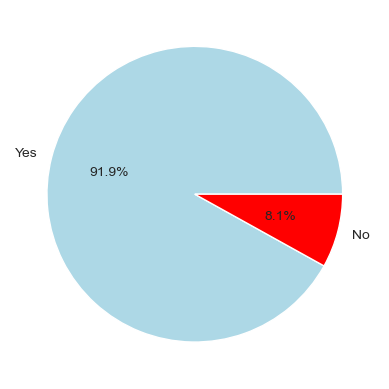

In [98]:
# Check Heart Disease variables that has 1 value for Yes heart disease and 0 for No heart disease
print("Heart Disease as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(new_train.Heart_Disease.value_counts(),autopct='%1.1f%%', labels=['Yes','No'], colors=['lightblue','red'])
plt.ylabel('')
plt.show()

Checking for removable columns/variables

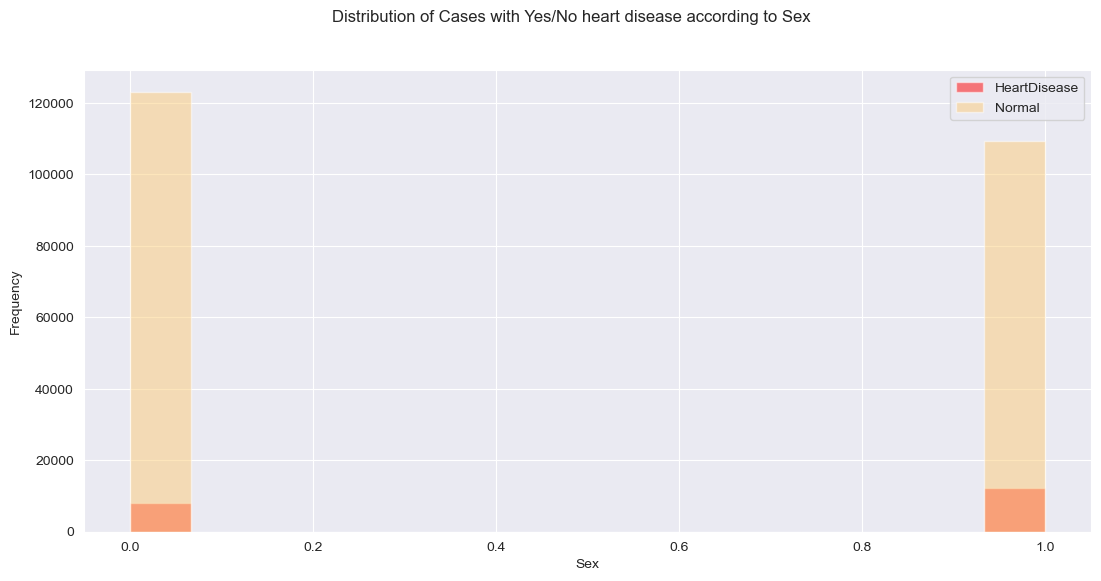

In [30]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Sex"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Sex"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Sex")

ax.legend();

* Male = 1 , Female = 0
* Most cases of heart disease are men
* Most cases that have no heart disease are women
* Significant data

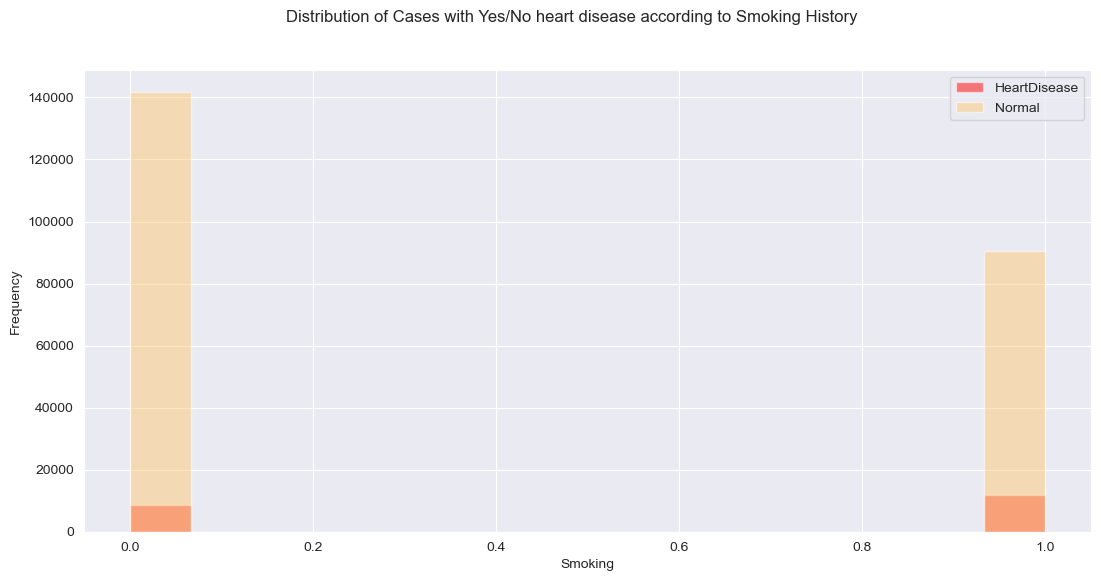

In [31]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Smoking_History"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Smoking_History"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Smoking History")

ax.legend();

* (Yes) Smoking History = 1, (No) Smoking History = 0
* For smokers, they have a larger group of patients with heart disease
* There are also cases of heart disease with no smoking history
* Significant data

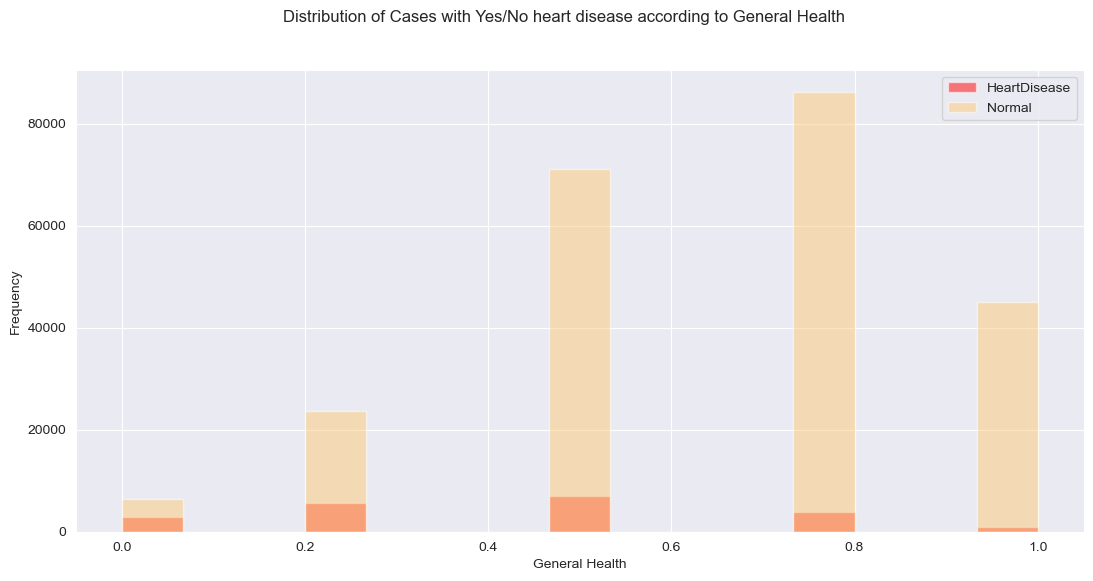

In [35]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["General_Health"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["General_Health"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("General Health")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to General Health")

ax.legend();

* Excellent = 1, Very Good = 0.75, Good = 0.5, Fair = 0.25, Poor = 0
* We can see that although there are no correlation between general health and cases of heart disease. For example, although the patient has good general health, the cases of heart disease is larger than those with poor general health.
* Insignificant data

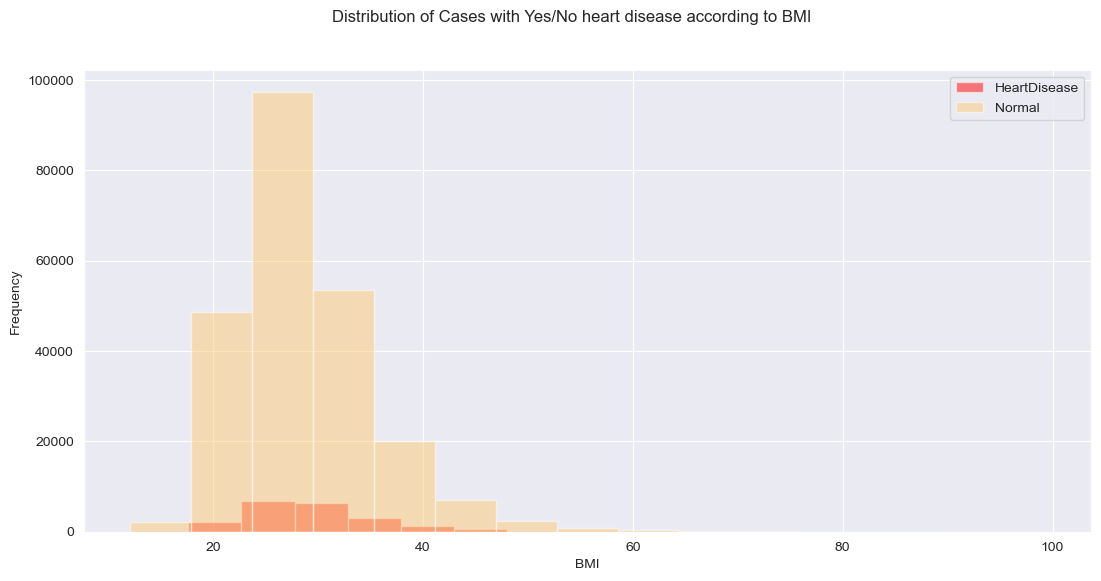

In [37]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["BMI"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["BMI"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to BMI")

ax.legend();

* There is a correlation that patients within the BMI range of 25 - 30 has a higher chance to get a heart disease. However, even though the patient has a BMI higher than 40, it doesn't always correlate to a heart disease. Whereas, patients below a BMI of 20 have no chance of getting a heart disease according to the data.
* Minimal significant data 

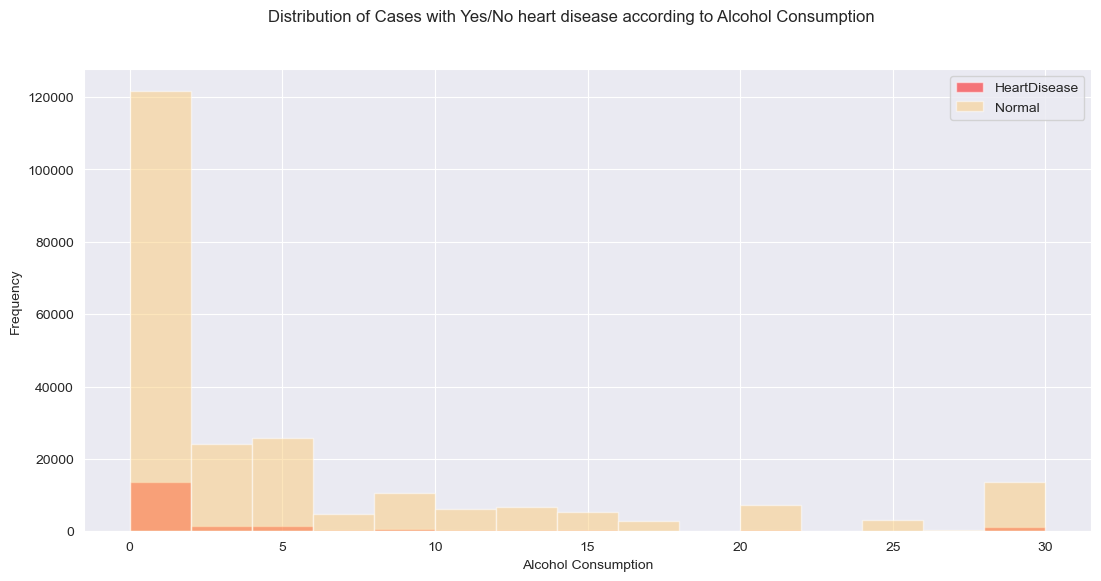

In [43]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Alcohol_Consumption"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Alcohol_Consumption"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Alcohol Consumption")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Alcohol Consumption")

ax.legend();

* Poor correlation between alcohol consumption
* Insignificant data

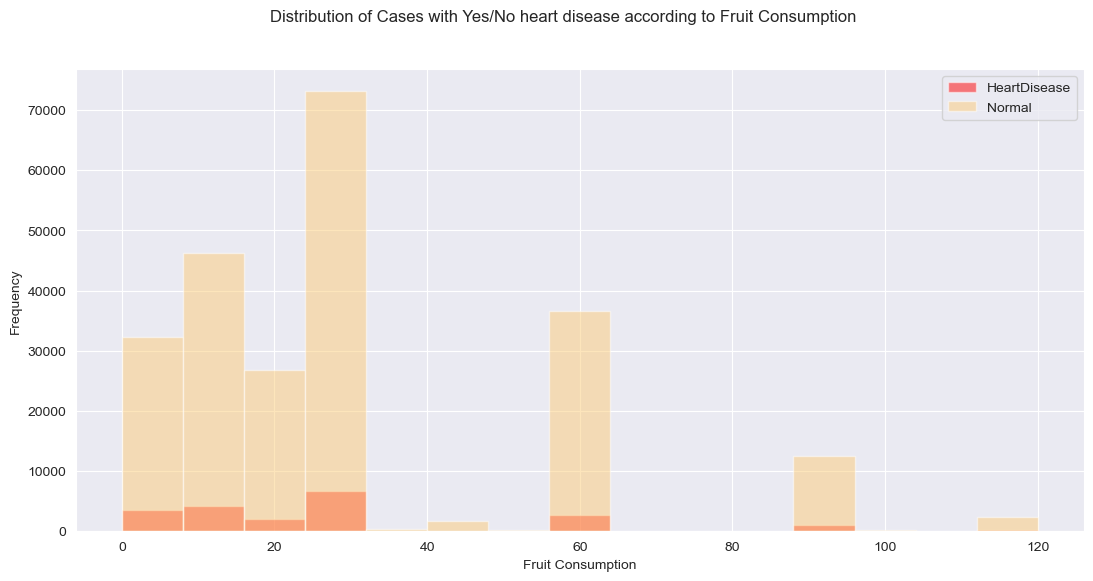

In [42]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Fruit_Consumption"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Fruit_Consumption"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Fruit Consumption")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Fruit Consumption")

ax.legend();

- Poor correlation between fruit consumption and heart disease
- Insignificant data

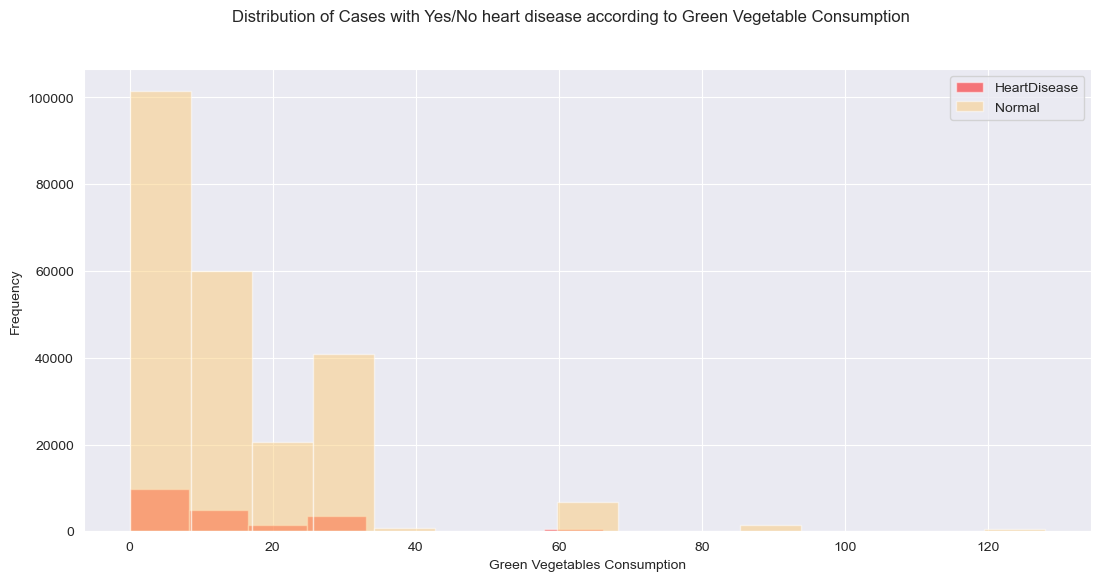

In [45]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Green_Vegetables_Consumption"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Green_Vegetables_Consumption"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Green Vegetables Consumption")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Green Vegetable Consumption")

ax.legend();

- Poor correlation between green vegetable consumption and heart disease
- Insignificant data

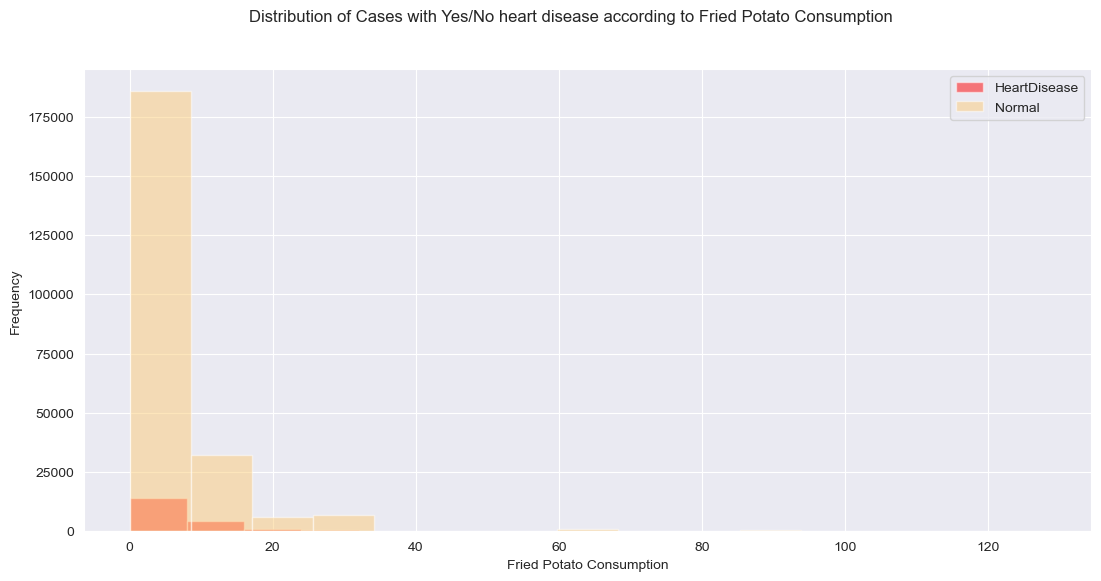

In [46]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["FriedPotato_Consumption"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["FriedPotato_Consumption"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Fried Potato Consumption")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Fried Potato Consumption")

ax.legend();

- Poor correlation between fried potato consumption and heart disease
- Insignificant data

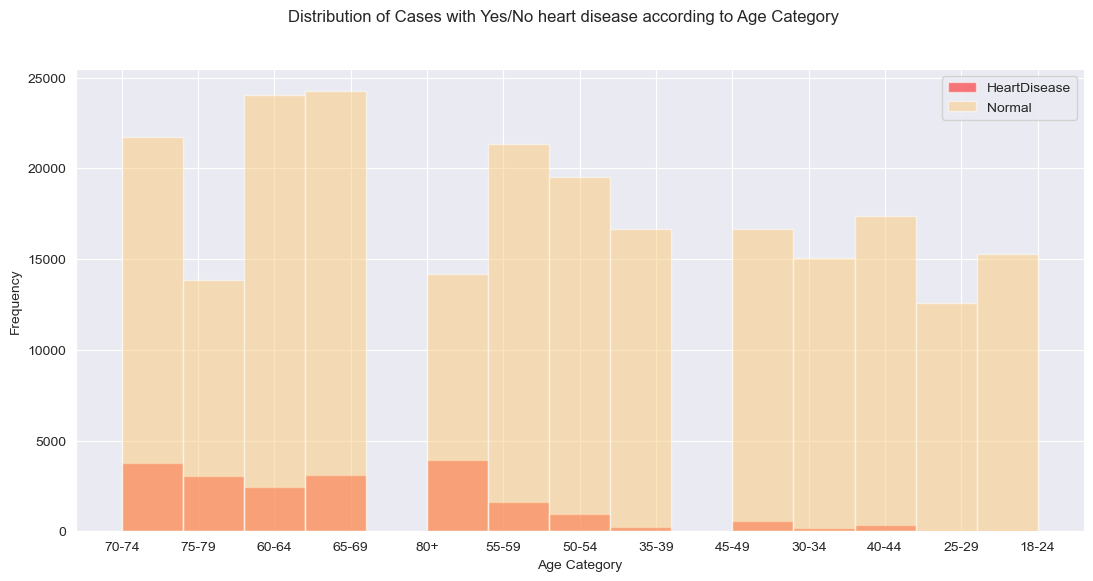

In [47]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Age_Category"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Age_Category"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Age Category")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Age Category")

ax.legend();

- There is a correlation between age and incidents of heart disease
- The older the patient, the more likely the patient will have a heart disease 
- Significant data

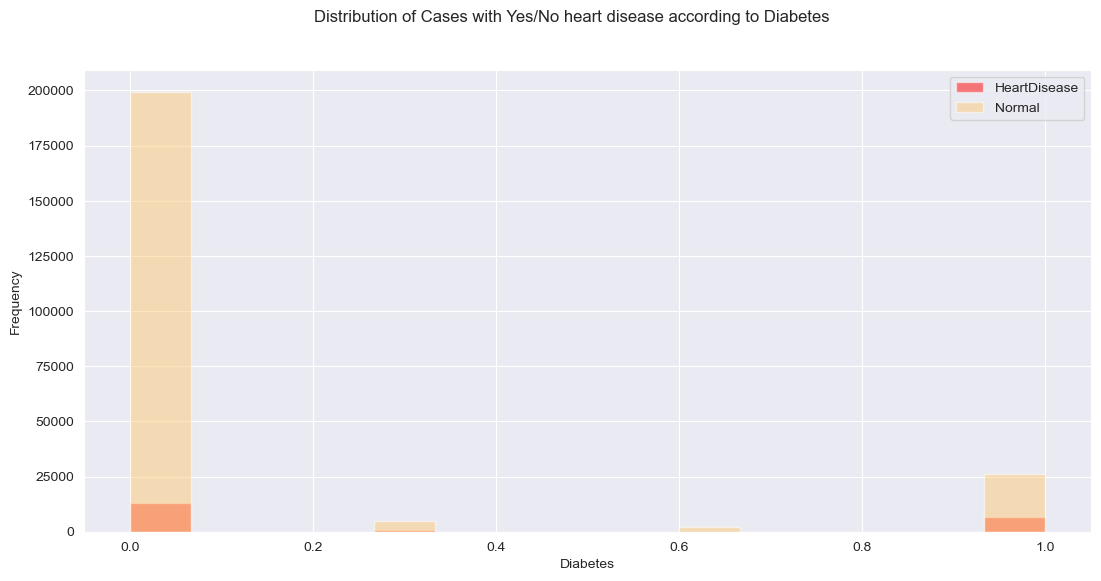

In [66]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Diabetes"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Diabetes"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetes")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Diabetes")

ax.legend();

- Yes = 1, Yes, but female told only during pregnancy = 0.66, No, pre-diabetes or borderline diabetes = 0.33, No = 0
- Poor correlation between diabetes and heart disease
- Insignificant data

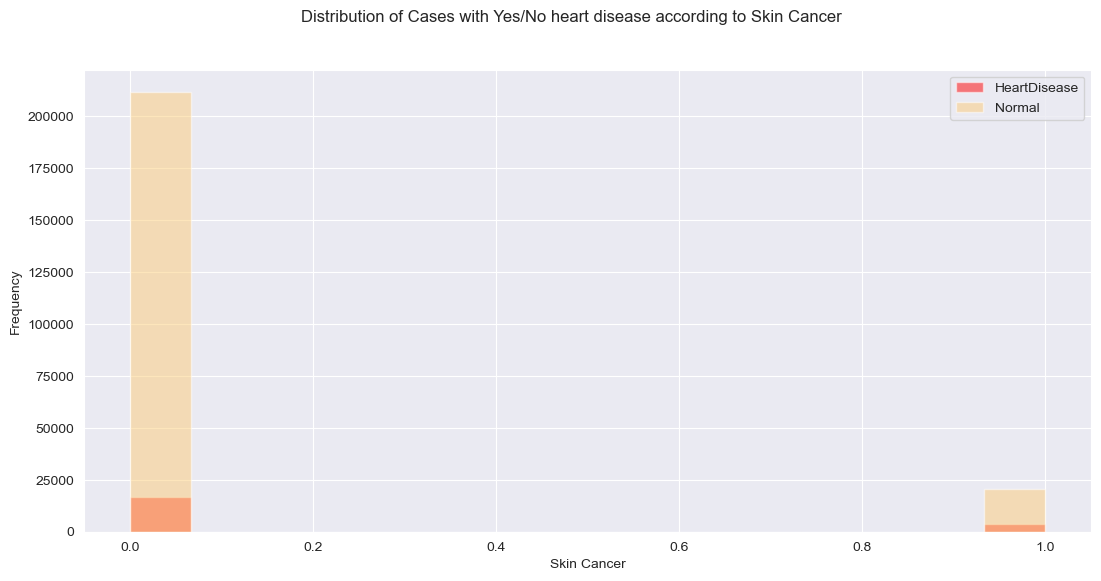

In [67]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Skin_Cancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Skin_Cancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Skin Cancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Skin Cancer")

ax.legend();

- Poor correlation between skin cancer and heart disease
- Insignificant data

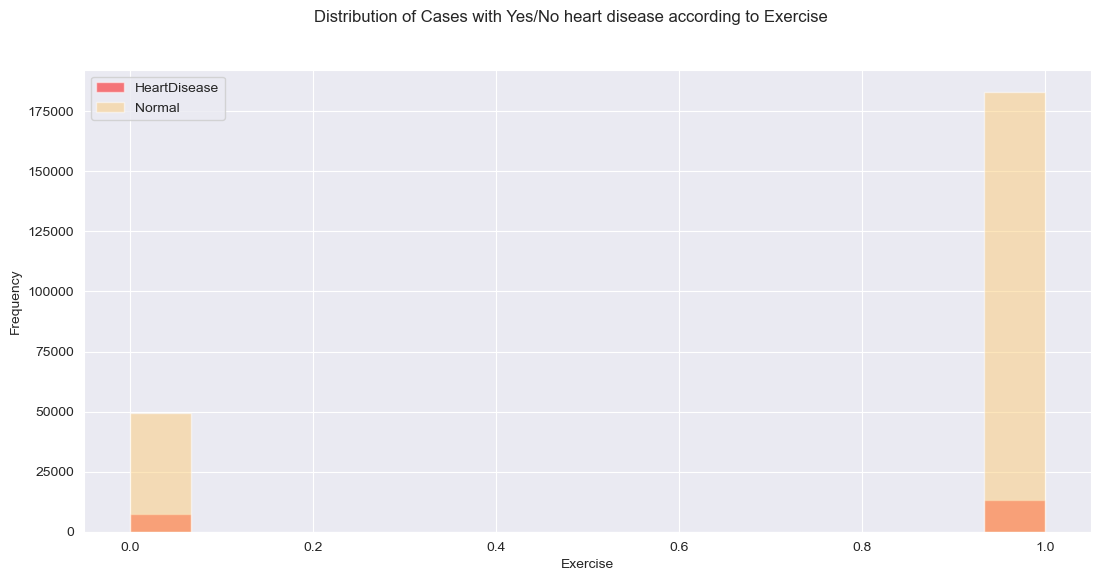

In [68]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Exercise"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Exercise"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Exercise")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Exercise")

ax.legend();

- Poor correlation between exercise and heart disease
- Insignificant data

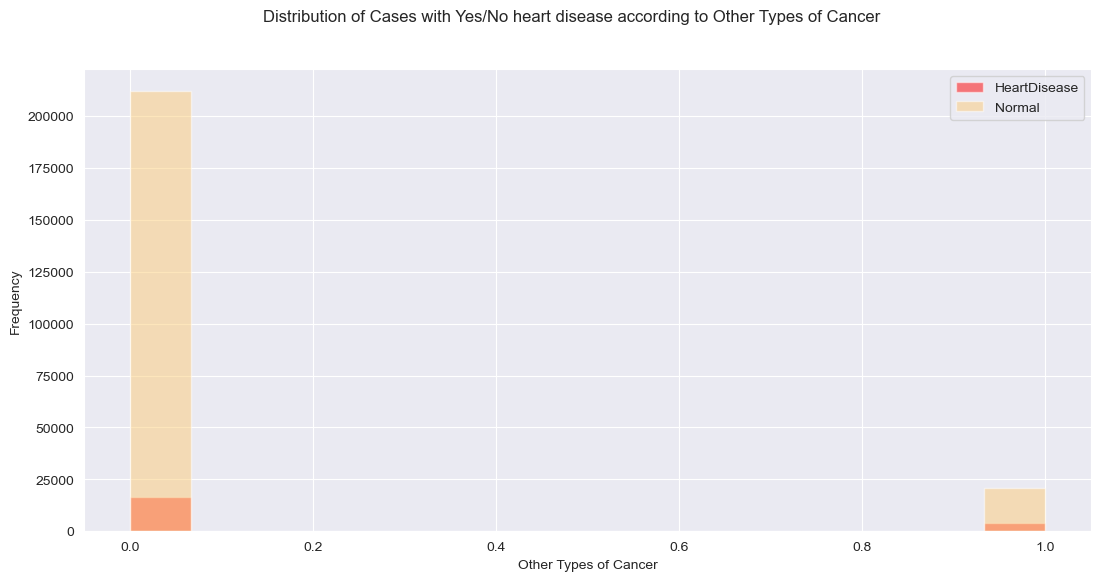

In [71]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Other_Cancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Other_Cancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Other Types of Cancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Other Types of Cancer")

ax.legend();

- Poor correlation between other types of cancer and heart disease
- Insignificant data

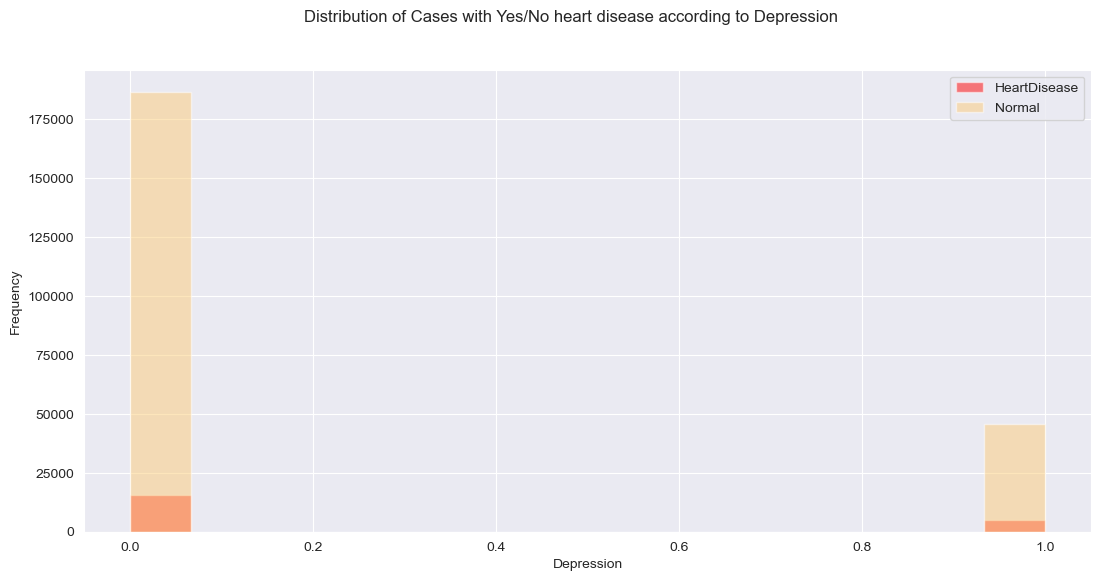

In [72]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Depression"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Depression"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Depression")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Depression")

ax.legend();

- Poor correlation between depression and heart disease
- Insignificant data

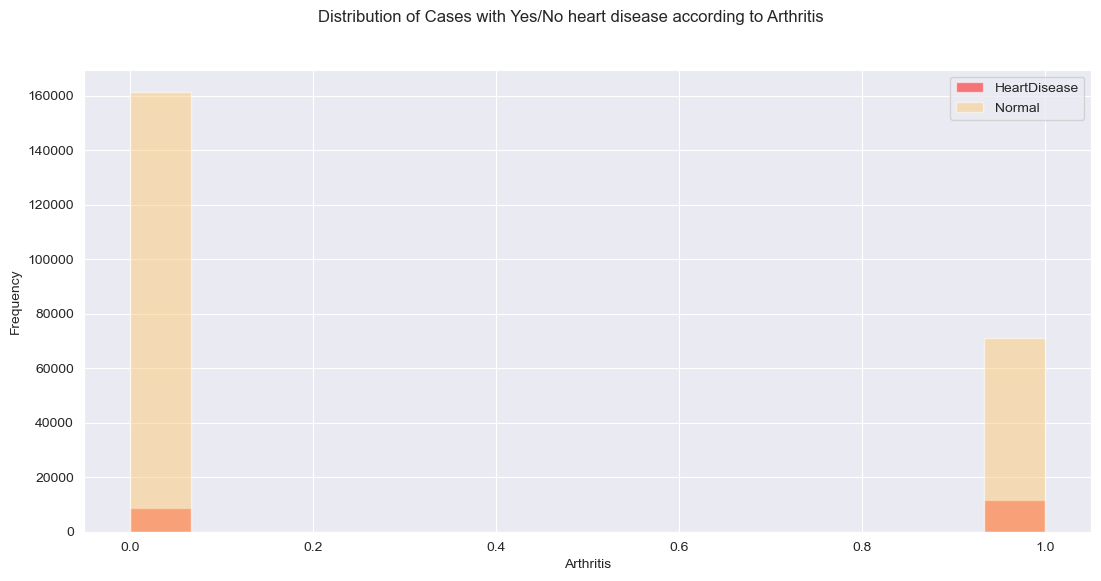

In [73]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Arthritis"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Arthritis"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Arthritis")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Arthritis")

ax.legend();

- There is a slight correlation between patients that have arthritis and heart disease
- Patients with arthritis has a higher frequency of having heart disease than patients that do not
- Significant data

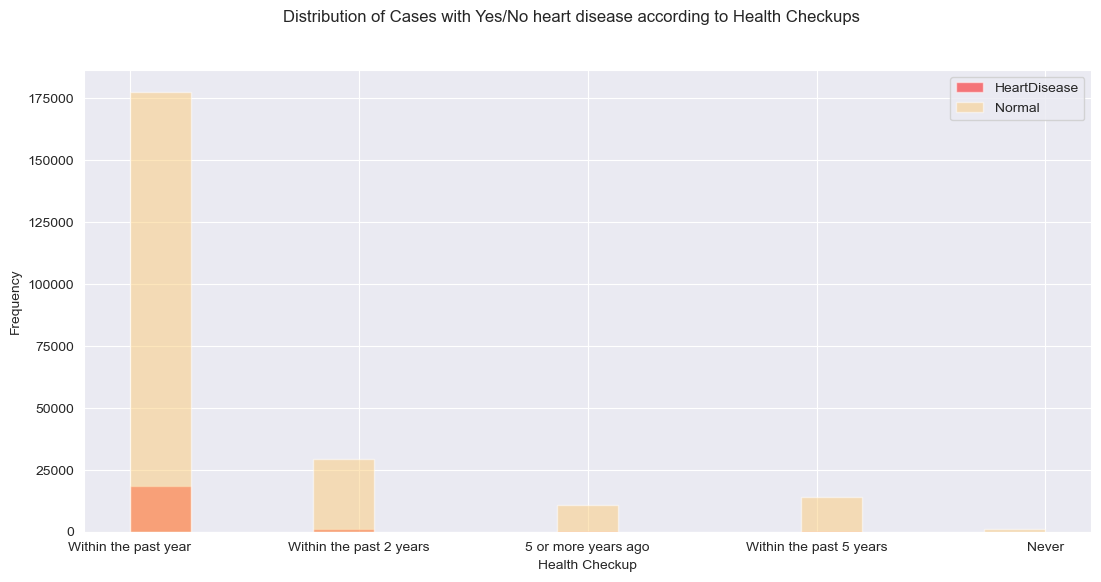

In [84]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Checkup"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Checkup"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Health Checkup")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Health Checkups")

ax.legend();

- There is a clear correlation between health checkups and heart disease
- Patients that have done a health checkup within the past year are more likely to have a heart disease than patients that have never taken a health checkup.
- Significant data

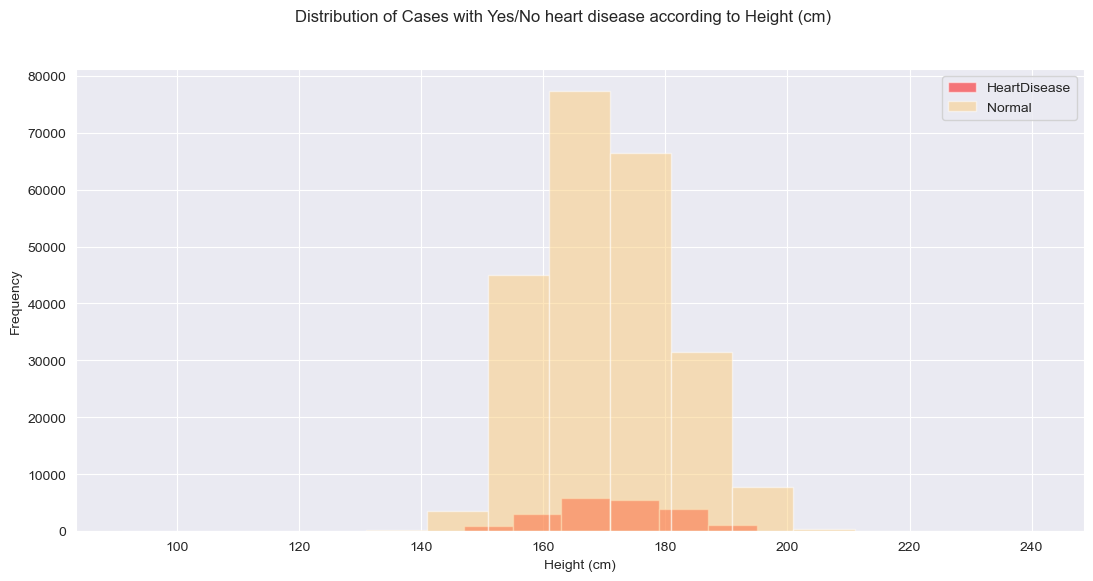

In [88]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Height_(cm)"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Height_(cm)"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Height (cm)")

ax.legend();

* There is a correlation that patients within the height range of 160 - 190 has a higher chance to get a heart disease. However, even though the patient's height is taller than 190, it doesn't always correlate to a heart disease. Whereas, patients below a height of 160 has less chance of getting a heart disease
* Minimal significant data 

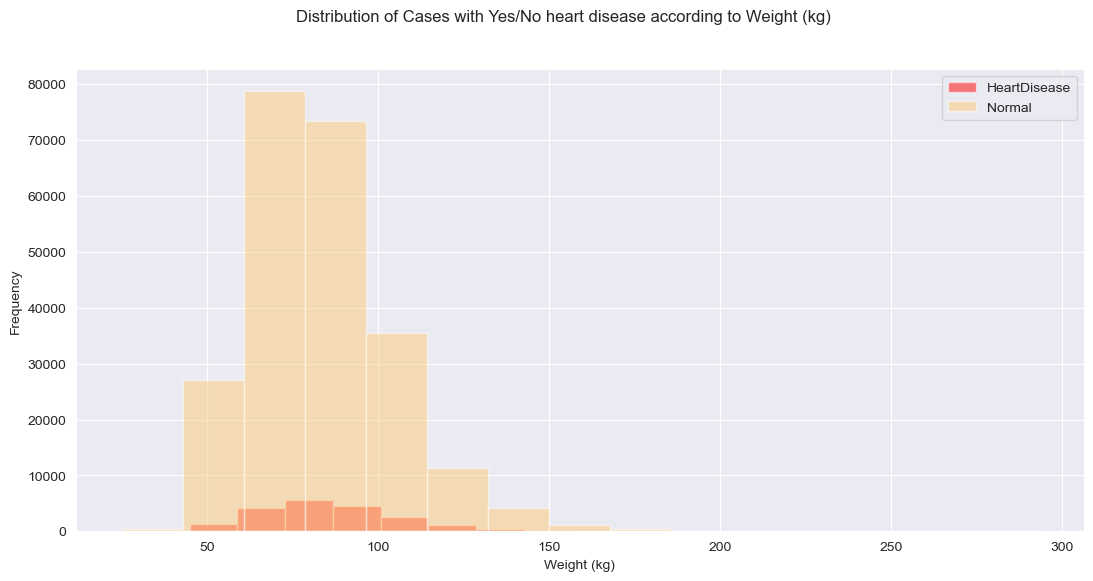

In [91]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(new_train[new_train["Heart_Disease"]==1]["Weight_(kg)"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(new_train[new_train["Heart_Disease"]==0]["Weight_(kg)"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heart disease according to Weight (kg)")

ax.legend();

* There is a correlation that patients within the weight range of 60 - 100 has a higher chance to get a heart disease. However, even though the patient's weight is heavier than 100, it doesn't always correlate to a heart disease. Whereas, patients below a weight of  60 has less chance of getting a heart disease
* Minimal significant data 

/var/folders/gw/m7333wt957q0gz8nbqnf596h0000gn/T/ipykernel_5627/1822370665.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_train.corr().round(2)


<Axes: >

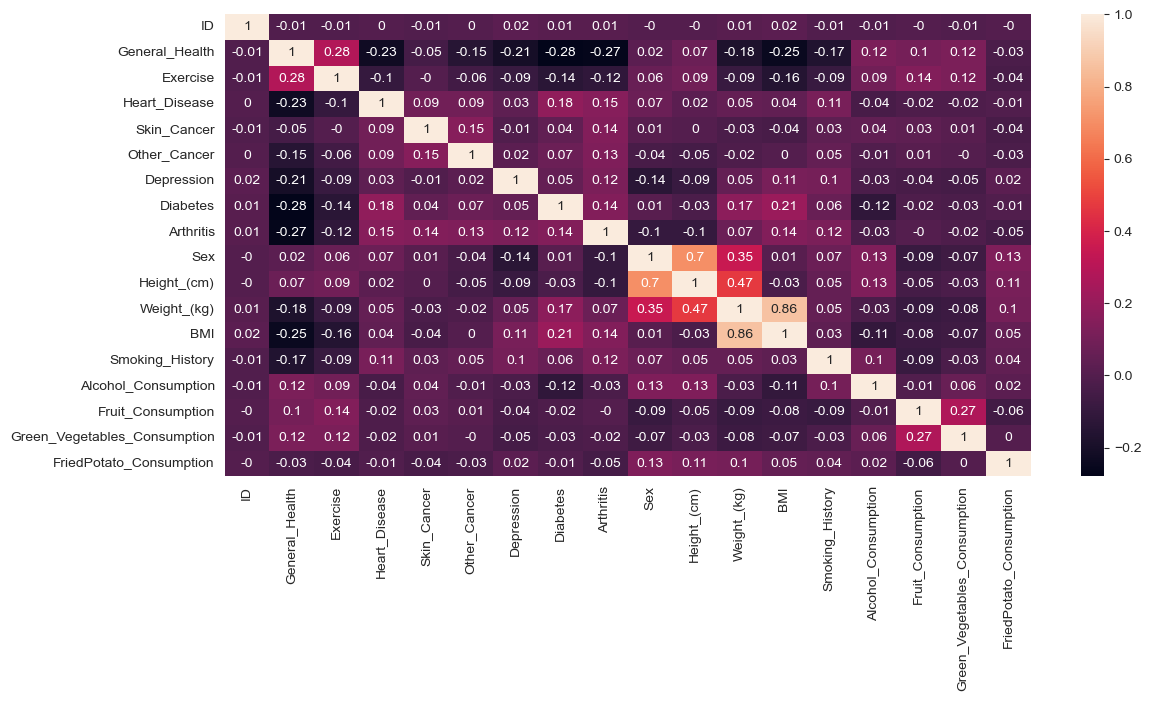

In [105]:
correlation = new_train.corr().round(2)
plt.figure(figsize=(13,6))
sns.heatmap(correlation, annot = True)

From the analysis above to check the comparison between the variables and heart disease, we can say that there are certain variables that can be removed. The variables that can be removed are: General_Health, Alcohol Consumption, Fruit Consumption, Green Vegetable Consumption, Fried Potato Consumption, Diabetes, Skin Cancer, Exercise, Other Cancer and Depression. Other columns such as ID can be removed during predictive analysis as it holds no significant statistical value.

In [106]:
#new_train.drop(columns=["General_Health", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption","Diabetes","Skin_Cancer","Exercise","Other_Cancer","Depression","ID"], inplace = True)

In [107]:
new_train.head()

,Checkup,Heart_Disease,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History
0,Within the past year,1,0,0,70-74,165.0,77.11,28.29,0
1,Within the past year,0,0,0,60-64,163.0,88.45,33.47,0
2,Within the past year,1,0,1,75-79,180.0,93.44,28.73,0
3,Within the past year,0,0,1,80+,191.0,88.45,24.37,1
4,Within the past year,0,1,1,60-64,183.0,154.22,46.11,0


In [108]:
# Change the values of the variables to numerical values for predictive analysis
new_train = pd.get_dummies(new_train)
new_train.head()

,Heart_Disease,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,1,0,0,165.0,77.11,28.29,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,163.0,88.45,33.47,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,180.0,93.44,28.73,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,191.0,88.45,24.37,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,183.0,154.22,46.11,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Training the Data

Splitting the data in test set (20%) and training set (80%) - this is based on the train dataset. In the end, the test dataset will be used to predict whether the patient has a heart disease or not.

In [125]:
def split_data(new_train):
    #test train split time
    y = new_train['Heart_Disease'].values #target
    X = new_train.drop(['Heart_Disease'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("Heart Disease in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [126]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

# Modelling the Data

In [127]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', str(confusion_matrix(y_test,y_pred))) 
    print("recall score: ", str(recall_score(y_test,y_pred)))
    print("precision score: ", str(precision_score(y_test,y_pred)))
    print("f1 score: ", str(f1_score(y_test,y_pred)))
    print("accuracy score: ", str(accuracy_score(y_test,y_pred)))
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    print(f"ROC AUC: {auc}")

# Building Model

Using GaussianNB

In [168]:
X_train, X_test, y_train, y_test = split_data(new_train)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))
print("ROC AUC score: ",roc_auc_score(y_test,y_pred))

train-set size:  202303 
test-set size:  50576
Heart Disease in test-set:  4077
train-set confusion matrix:
 [[99097 86897]
 [ 2385 13924]]
test-set confusion matrix:
 [[24813 21686]
 [  607  3470]]
recall score:  0.8511160166789306
precision score:  0.13793925902369217
f1 score:  0.23740293503916807
accuracy score:  0.559217810819361
ROC AUC score:  0.6923701978489171


Using Logistic Regression

In [147]:
# let us check recall score for logistic regression
X_train, X_test, y_train, y_test = split_data(new_train)
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear'), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set size:  202303 
test-set size:  50576
Heart Disease in test-set:  4077
train-set confusion matrix:
 [[185984     10]
 [ 16303      6]]
test-set confusion matrix:
 [[46495     4]
 [ 4074     3]]
recall score:  0.0007358351729212656
precision score:  0.42857142857142855
f1 score:  0.0014691478942213518
accuracy score:  0.9193688706105663
ROC AUC: 0.7900199752160109


Checking Logistic Regression with undersampled data as the recall score is low. 

In [148]:
# get indices for yes heart disease and no heart disease classes 
heartdisease_ind = new_train[new_train.Heart_Disease == 1].index
noheartdisease_ind = new_train[new_train.Heart_Disease == 0].index

# Convert to series and random selection from genuine class
noheartdisease_ind_series = pd.Series(noheartdisease_ind)
random_noheartdisease_ind = noheartdisease_ind_series.sample(n=len(heartdisease_ind), replace=False)

# Combine fraud indices with random genuine indices
under_sample_ind = pd.concat([pd.Series(heartdisease_ind), random_noheartdisease_ind])

# Get the undersampled DataFrame
undersample_new_train = new_train.loc[under_sample_ind]

# Set target variable y and feature set X
y_undersample = undersample_new_train['Heart_Disease']
X_undersample = undersample_new_train.drop(['Heart_Disease'], axis=1)

# Print information
print("Number of patients with heart disease in undersampled data: ", len(undersample_new_train))
print("Percentage (%) of having no heart disease: ", len(undersample_new_train[undersample_new_train.Heart_Disease == 0])/len(undersample_new_train))
print("Percentage (%) of having heart disease: ", len(undersample_new_train[undersample_new_train.Heart_Disease == 1])/len(undersample_new_train))

Number of patients with heart disease in undersampled data:  40772
Percentage (%) of having no heart disease:  0.5
Percentage (%) of having heart disease:  0.5


In [149]:
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_new_train)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

train-set size:  32617 
test-set size:  8155
Heart Disease in test-set:  4077
train-set confusion matrix:
 [[11110  5198]
 [ 3998 12311]]
test-set confusion matrix:
 [[2824 1254]
 [1025 3052]]
recall score:  0.7485896492519009
precision score:  0.7087784486762657
f1 score:  0.7281402839079089
accuracy score:  0.7205395462906192
ROC AUC: 0.7892675787558359


In [154]:
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = new_train['Heart_Disease'].values #target
X_full = new_train.drop(['Heart_Disease'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))
print("f1 score: ", f1_score(y_full,y_full_pred))
print("accuracy score: ", accuracy_score(y_full,y_full_pred))
print("ROC AUC score: ",roc_auc_score(y_full,y_full_pred))

/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


scores for Full set
test-set confusion matrix:
 [[159477  73016]
 [  4913  15473]]
recall score:  0.7590012753850682
precision score:  0.17485789194137125
f1 score:  0.28423421354764644
accuracy score:  0.6918328528663906
ROC AUC score:  0.7224722540422737


# Comparison

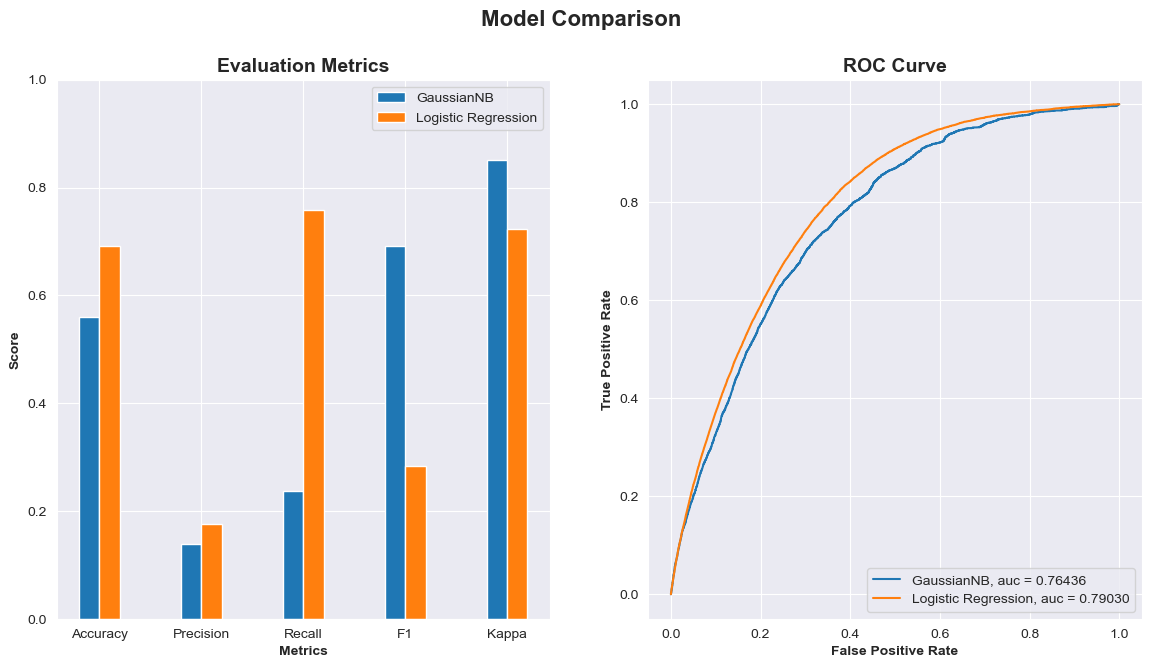

In [169]:
from sklearn.metrics import roc_curve, auc

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_lr, tpr_lr, _ = roc_curve(y_full, y_full_pred_prob[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

gnb_score = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), 
            f1_score(y_test,y_pred), roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred) ]

lr_score = [accuracy_score(y_full, y_full_pred), precision_score(y_full, y_full_pred), 
            recall_score(y_full, y_full_pred), f1_score(y_full, y_full_pred), roc_auc_score(y_full,y_full_pred)]

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2

## Set position of bar on X axis
r1 = np.arange(len(gnb_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, gnb_score, width=barWidth, edgecolor='white', label='GaussianNB')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(gnb_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(fpr_gnb, tpr_gnb, label='GaussianNB, auc = {:0.5f}'.format(roc_auc_gnb))
ax2.plot(fpr_lr, tpr_lr, label='Logistic Regression, auc = {:0.5f}'.format(roc_auc_lr))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

According to this comparison graph, we can tell that modelling through logistic regression may a better choice to analyze the test dataset because it has a better accuracy, precision and recall score. It is also important to point out that the ROC curve of Logistic Regression is larger than that of GaussianNB. This generally means that the Logistic Regression model has better overall performance in terms of discriminative ability for the given problem.

# Using the Logistic Regression model to make prediction on the Test dataset

Changing the values of the variables. Removing the same columns from the Test dataset that I have removed from the Train dataset

In [175]:
new_test =  test[test.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0, 'Excellent': 1, 'Very Good': 0.75, 'Good': 0.5, 'Fair': 0.25, 'Poor': 0, 'No, pre-diabetes or borderline diabetes':0.33, 'Yes, but female told only during pregnancy': 0.66})

In [176]:
#new_test.drop(columns=["General_Health", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption","Diabetes","Skin_Cancer","Exercise","Other_Cancer","Depression"], inplace = True)

In [177]:
new_test = pd.get_dummies(new_test)

In [179]:
new_test.head()

,ID,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,0,1,0,150.0,32.66,14.54,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,14,0,0,152.0,52.16,22.46,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,16,0,1,183.0,99.79,29.84,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,21,1,1,175.0,81.65,26.58,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24,1,0,160.0,70.31,27.46,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [189]:
X_new_test = new_test.drop(["ID"], axis=1).values

# Use the trained model to make predictions on the new test set
new_test_predictions = lr.predict(X_new_test)

# Create a new DataFrame with "Patient_ID" and predicted "Heart_Disease"
result = pd.DataFrame({
    "Patient_ID": new_test["ID"],
    "Heart_Disease": new_test_predictions
})

/Users/derek/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'Yes'

In [194]:
result

,ID,Heart_Disease
0,0,Yes
1,14,No
2,16,Yes
3,21,Yes
4,24,Yes
...,...,...
61765,308834,No
61766,308836,Yes
61767,308842,No
61768,308848,No


In [196]:
result.to_csv("/Users/derek/Desktop/PyCharm./Unit_3_X_ML/data/heart_disease_predictions.csv", index=False)